In [36]:
import keras
import numpy as np
import pandas as pd
from sklearn import *
import matplotlib.pyplot as plt

In [37]:
# Ruta del archivo CSV
ruta_archivo = '/content/drive/MyDrive/Curso : Machine Learning/Taller Practico Regresión /housing.csv'

# Leer el archivo CSV y crear un DataFrame
dataframe = pd.read_csv(ruta_archivo)

# Imprimir el contenido del DataFrame
dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [38]:
from sklearn.preprocessing import StandardScaler

# Obtener las columnas numéricas del dataset
columnas_numericas = dataframe.select_dtypes(include=[float, int]).columns

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Aplicar la estandarización a las columnas numéricas
dataframe[columnas_numericas] = scaler.fit_transform(dataframe[columnas_numericas])

# Imprimir el dataset estandarizado
dataframe


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.804819,-0.970325,-0.974429,-0.977033,2.344766,2.129631,NEAR BAY
1,-1.322844,1.043185,-0.607019,2.045890,1.348276,0.861439,1.669961,2.332238,1.314156,NEAR BAY
2,-1.332827,1.038503,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699,1.258693,NEAR BAY
3,-1.337818,1.038503,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968,1.165100,NEAR BAY
4,-1.337818,1.038503,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881,1.172900,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.388895,-0.512592,-0.443449,-1.216128,-1.115804,INLAND
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.920488,-0.944405,-1.008420,-0.691593,-1.124470,INLAND
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.125472,-0.369537,-0.174042,-1.142593,-0.992746,INLAND
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.305834,-0.604429,-0.393753,-1.054583,-1.058608,INLAND


In [39]:
# Crear una máscara booleana para identificar los valores faltantes
mascara_valores_faltantes = dataframe.isnull()

# Obtener las filas que contienen valores faltantes
filas_con_valores_faltantes = dataframe[dataframe.isnull().any(axis=1)]
filas_con_valores_faltantes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-1.292896,1.001048,1.458891,-0.632466,NaN,-0.755431,-0.736397,0.265468,-0.389589,NEAR BAY
341,-1.297887,0.991684,0.743768,-0.753480,NaN,-0.612377,-0.629157,-1.184914,-1.055142,NEAR BAY
538,-1.352792,1.005730,0.028646,1.154327,NaN,2.044730,2.023068,-0.681381,-0.289930,NEAR BAY
563,-1.332827,0.991684,1.299975,-0.799777,NaN,-0.919679,-0.924721,0.567556,0.348758,NEAR BAY
696,-1.262948,0.963593,0.982143,-0.866243,NaN,-0.917030,-0.885487,0.018754,-0.246600,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,0.189522,-0.670378,-0.845393,0.451161,NaN,1.541390,0.730958,-0.278860,0.118241,NEAR OCEAN
20268,0.194513,-0.675060,-0.765935,-0.111279,NaN,0.452585,0.686493,-1.145067,-0.341926,NEAR OCEAN
20372,0.344253,-0.684424,-1.083767,0.744529,NaN,0.243302,0.443242,0.648829,1.766524,<1H OCEAN
20460,0.409140,-0.628242,-0.924851,1.318430,NaN,1.155496,0.822504,1.440501,0.444085,<1H OCEAN


In [40]:
# Eliminar filas con valores faltantes
dataframe_sin_valores_faltantes = dataframe.dropna(axis=0)
filas_con_valores_faltantes_clean = dataframe_sin_valores_faltantes[dataframe_sin_valores_faltantes.isnull().any(axis=1)]
filas_con_valores_faltantes_clean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


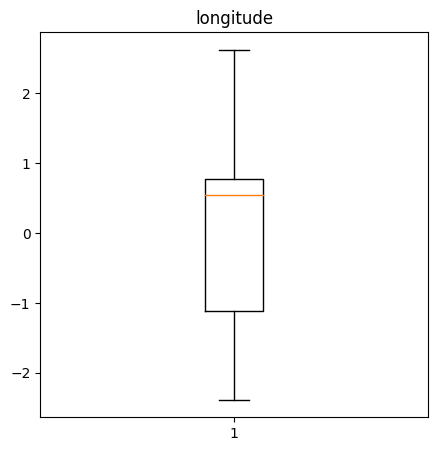

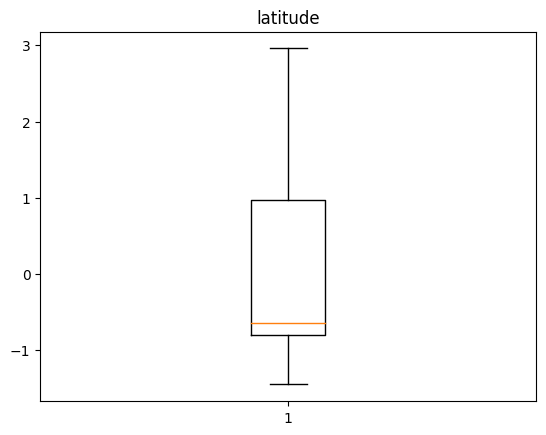

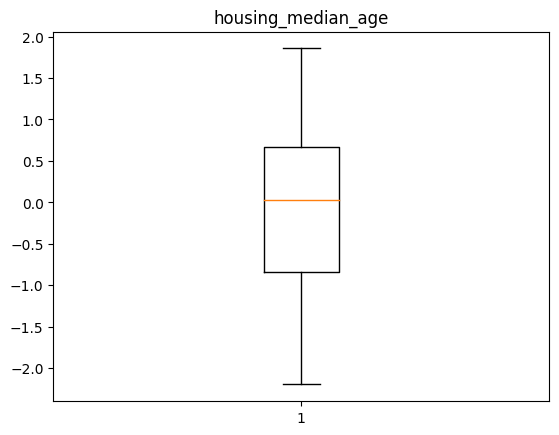

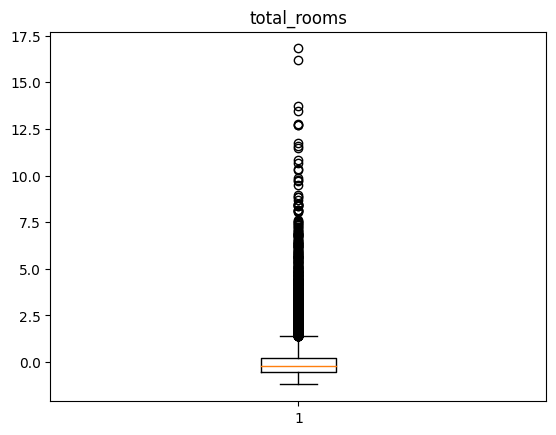

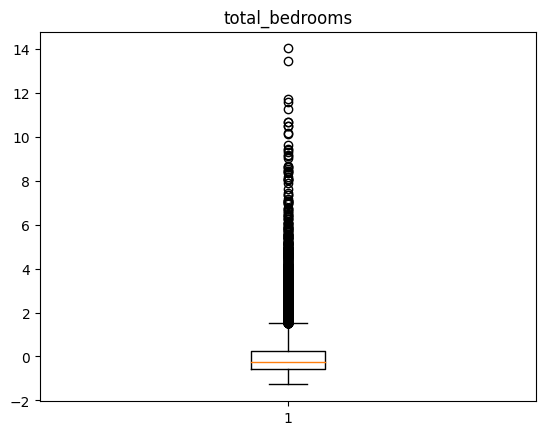

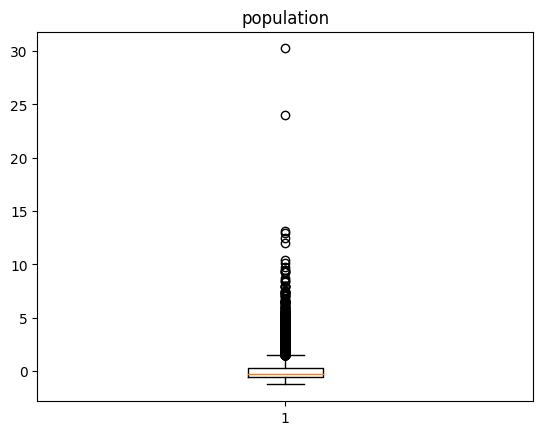

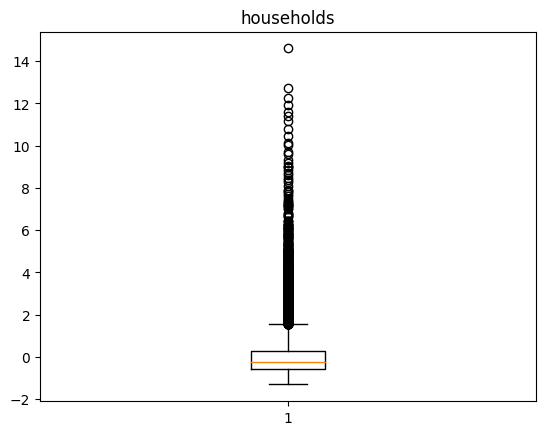

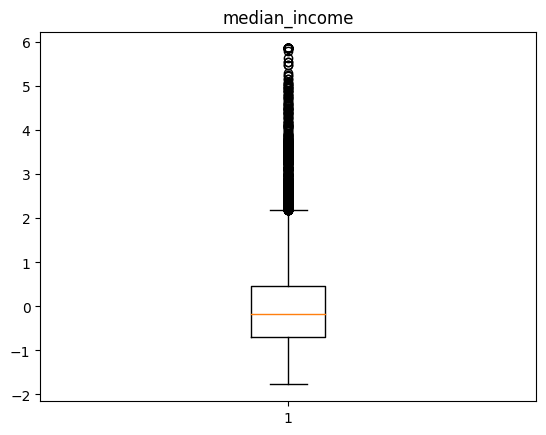

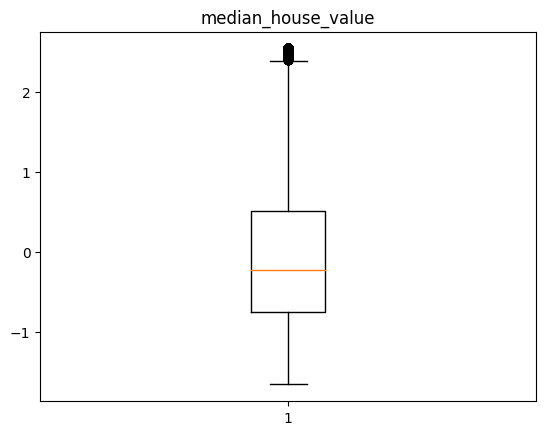

In [41]:
# Crear el diagrama de caja utilizando matplotlib
plt.figure(figsize=(5, 5))
for i in dataframe_sin_valores_faltantes.columns:
  if i == 'ocean_proximity':
    continue
  else:
    plt.title(i)
    plt.boxplot(dataframe_sin_valores_faltantes[i])
    plt.show()

In [42]:
df = dataframe_sin_valores_faltantes

# Calcular el rango intercuartil
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Definir un umbral para identificar los valores extremos
umbral = 0.7
umbral_inferior = Q1 - umbral * IQR
umbral_superior = Q3 + umbral * IQR

# Eliminar las filas con valores extremos
df_sin_valores_extremos = df[~((df < umbral_inferior) | (df > umbral_superior)).any(axis=1)]

<ipython-input-42-c5ef2560e731>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-42-c5ef2560e731>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-42-c5ef2560e731>:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_sin_valores_extremos = df[~((df < umbral_inferior) | (df > umbral_superior)).any(axis=1)]


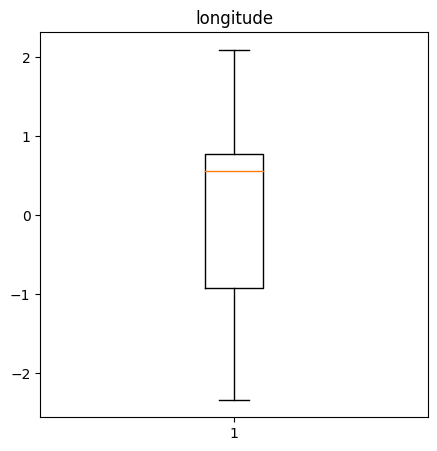

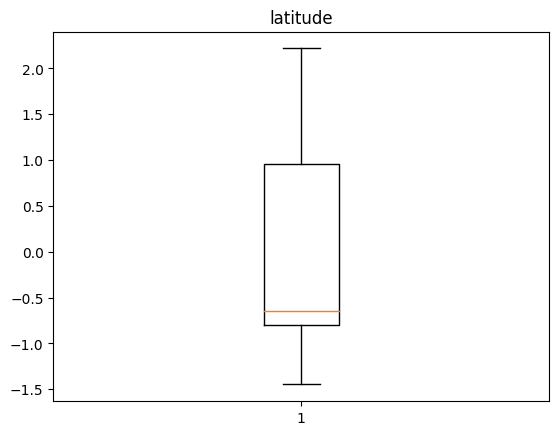

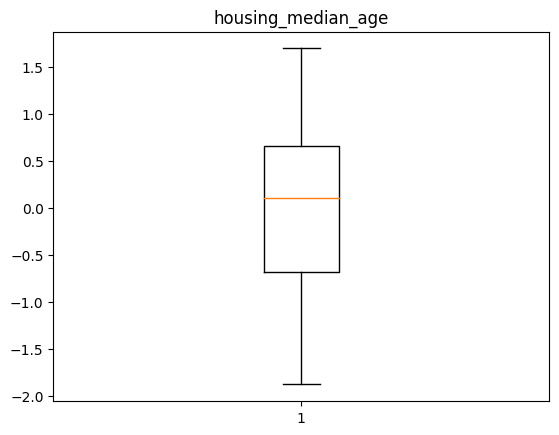

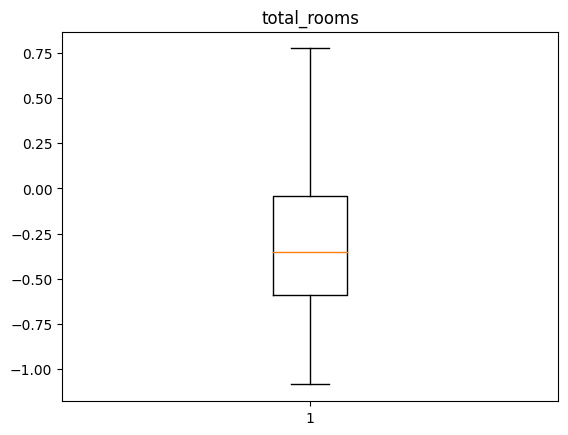

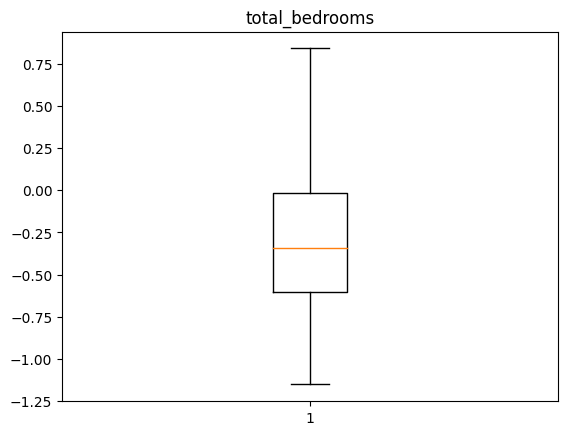

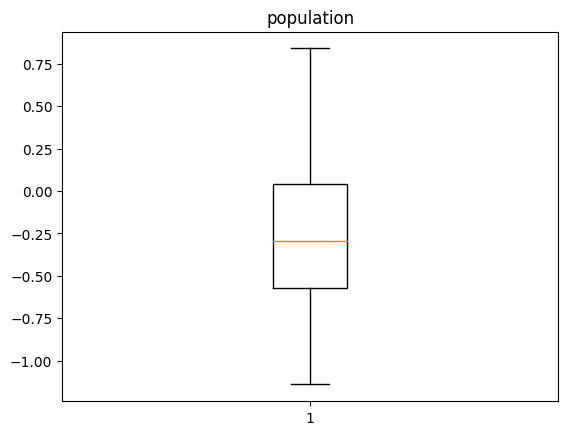

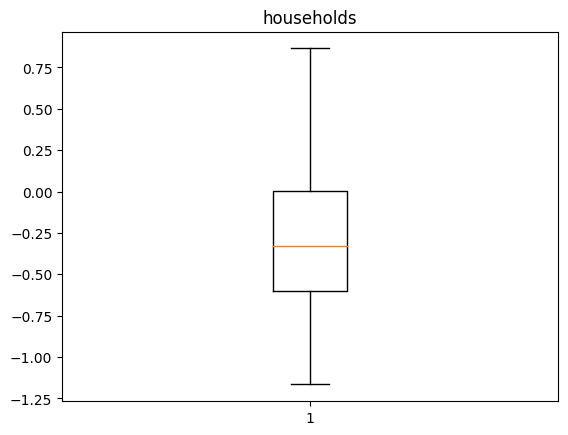

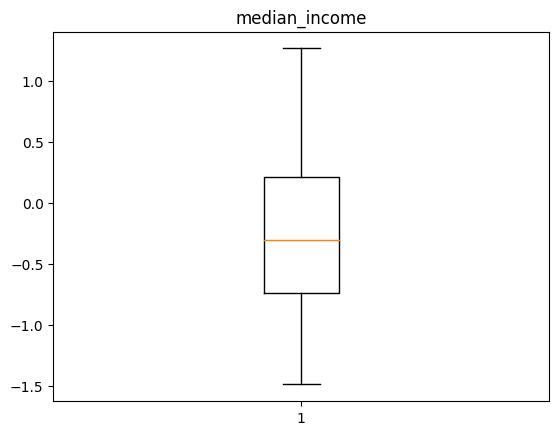

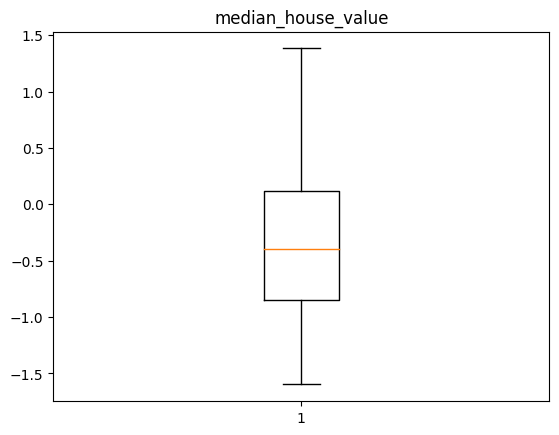

In [43]:
# Crear el diagrama de caja utilizando matplotlib
plt.figure(figsize=(5, 5))
for i in df_sin_valores_extremos.columns:
  if i == 'ocean_proximity':
    continue
  else:
    plt.title(i)
    plt.boxplot(df_sin_valores_extremos[i])
    plt.show()

In [44]:
df_sin_valores_extremos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8,-1.342809,1.033821,1.061601,-0.037021,0.301702,-0.193810,0.249687,-0.942359,0.171971,NEAR BAY
15,-1.342809,1.038503,1.697265,-0.694806,-0.604855,-0.643284,-0.616079,-0.918883,-0.579376,NEAR BAY
18,-1.342809,1.033821,1.697265,-0.181871,-0.196667,-0.384549,-0.210660,-0.989365,-0.417321,NEAR BAY
20,-1.347800,1.038503,0.902685,-0.863951,-0.839800,-0.897603,-0.872409,-1.322720,-0.514381,NEAR BAY
21,-1.347800,1.038503,1.061601,-0.456903,-0.405507,-0.438415,-0.349287,-1.135487,-0.407788,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.388895,-0.512592,-0.443449,-1.216128,-1.115804,INLAND
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.920488,-0.944405,-1.008420,-0.691593,-1.124470,INLAND
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.125472,-0.369537,-0.174042,-1.142593,-0.992746,INLAND
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.305834,-0.604429,-0.393753,-1.054583,-1.058608,INLAND


In [50]:
# , 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income'
X = dataframe_sin_valores_faltantes[['total_rooms','total_bedrooms']]
Y = dataframe_sin_valores_faltantes[['median_house_value']]

In [51]:
print(X.shape)
print(Y.shape)

(20433, 2)
(20433, 1)


In [52]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, Y, test_size=0.3, random_state=42)
X_entrenamiento, X_validacion, y_entrenamiento, y_validacion = train_test_split(X_entrenamiento, y_entrenamiento, test_size=0.3, random_state=42)


In [53]:
n_features = X.shape[1]
X.shape
#n_classes = len(np.unique(Y))

(20433, 2)

Epoch 1/100
313/313 [==============================] - 2s 5ms/step - loss: 0.6161 - accuracy: 0.0000e+00 - precision: 1.0000 - recall: 0.0672 - auc: 0.0000e+00 - val_loss: 0.5484 - val_accuracy: 0.0000e+00 - val_precision: 1.0000 - val_recall: 0.0585 - val_auc: 0.0000e+00
Epoch 2/100
313/313 [==============================] - 0s 2ms/step - loss: 0.4830 - accuracy: 0.0000e+00 - precision: 1.0000 - recall: 0.0510 - auc: 0.0000e+00 - val_loss: 0.4387 - val_accuracy: 0.0000e+00 - val_precision: 1.0000 - val_recall: 0.0489 - val_auc: 0.0000e+00
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 0.3825 - accuracy: 0.0000e+00 - precision: 1.0000 - recall: 0.0417 - auc: 0.0000e+00 - val_loss: 0.3545 - val_accuracy: 0.0000e+00 - val_precision: 1.0000 - val_recall: 0.0347 - val_auc: 0.0000e+00
Epoch 4/100
313/313 [==============================] - 1s 4ms/step - loss: 0.3029 - accuracy: 0.0000e+00 - precision: 1.0000 - recall: 0.0313 - auc: 0.0000e+00 - val_loss: 0.2870 - 

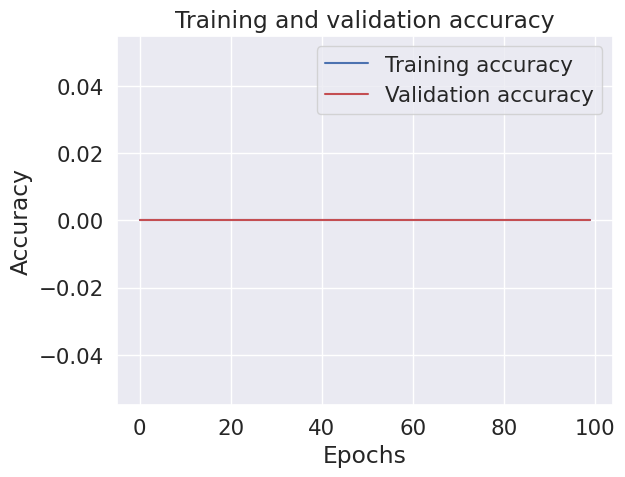

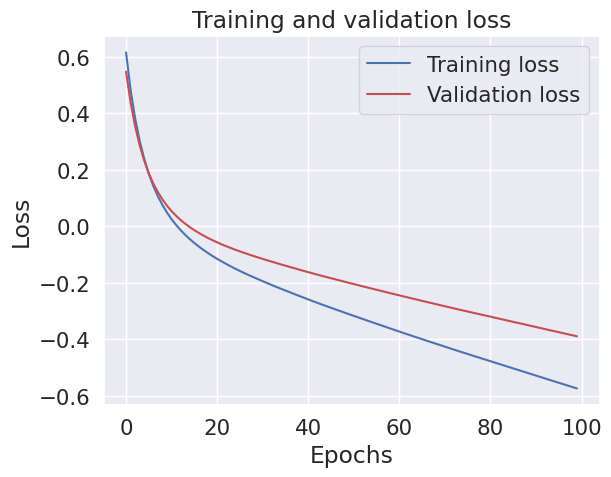

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense ,Dropout

model = Sequential()
model.add(Dense(1, input_dim=n_features, kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics = ['accuracy','Precision','Recall','AUC'])
history = model.fit(X_entrenamiento,y_entrenamiento, epochs=100, batch_size=32,validation_data=(X_validacion,y_validacion))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

135/135 [==============================] - 0s 857us/step
Precisión: 74.59799580517362 %


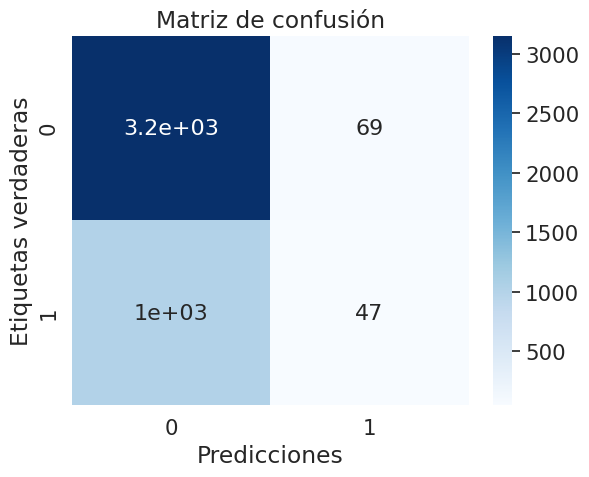

In [63]:
import seaborn as sns
# Predicciones en el conjunto de validación
y_pred = model.predict(X_validacion)
y_pred_classes = (y_pred > 0.5).astype(int)  # Conversión de probabilidades a clases binarias
y_validacion_bin = (y_validacion > 0.5).astype(int)
# Cálculo de la matriz de confusión
accuracy = accuracy_score(y_validacion_bin, y_pred_classes)
confusion_mat = confusion_matrix(y_validacion_bin, y_pred_classes)
print('Precisión:', accuracy*100,'%')
# Imprimir la matriz de confusión
# Graficar la matriz de confusión con Seaborn
sns.set(font_scale=1.4) # Ajustar el tamaño de la fuente
sns.heatmap(confusion_mat, annot=True, annot_kws={"size": 16}, cmap="Blues")

# Personalizar la figura
plt.title('Matriz de confusión')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas verdaderas')
plt.show()

Epoch 1/100
313/313 [==============================] - 58s 2ms/step - loss: 1.2115 - accuracy: 0.0000e+00 - precision: 1.0000 - recall: 0.1597 - auc: 0.0000e+00 - val_loss: 1.1595 - val_accuracy: 0.0000e+00 - val_precision: 1.0000 - val_recall: 0.0235 - val_auc: 0.0000e+00
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 1.1071 - accuracy: 0.0000e+00 - precision: 1.0000 - recall: 0.0154 - auc: 0.0000e+00 - val_loss: 1.0984 - val_accuracy: 0.0000e+00 - val_precision: 1.0000 - val_recall: 0.0103 - val_auc: 0.0000e+00
Epoch 3/100
313/313 [==============================] - 1s 3ms/step - loss: 1.0639 - accuracy: 0.0000e+00 - precision: 1.0000 - recall: 0.0100 - auc: 0.0000e+00 - val_loss: 1.0709 - val_accuracy: 0.0000e+00 - val_precision: 1.0000 - val_recall: 0.0075 - val_auc: 0.0000e+00
Epoch 4/100
313/313 [==============================] - 1s 3ms/step - loss: 1.0426 - accuracy: 0.0000e+00 - precision: 1.0000 - recall: 0.0071 - auc: 0.0000e+00 - val_loss: 1.0560 -

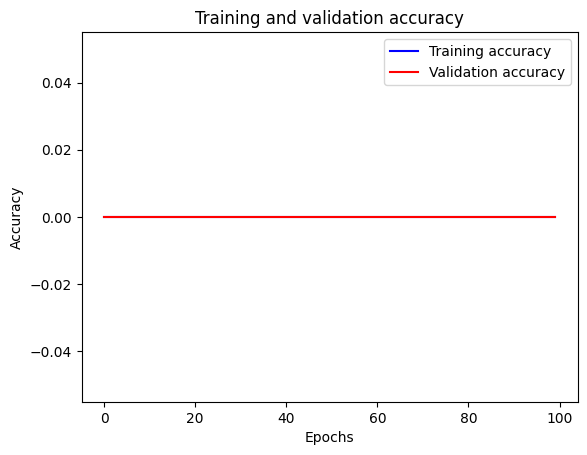

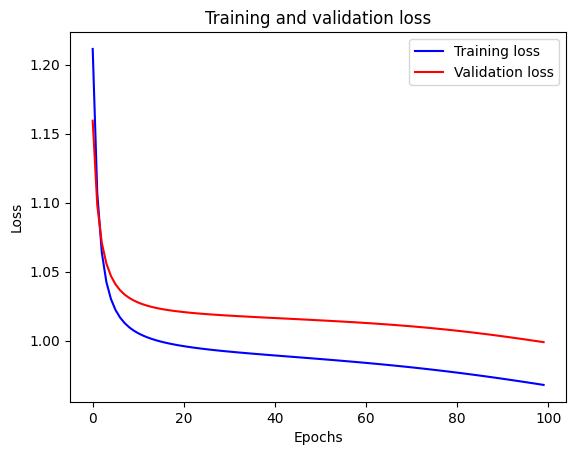

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense ,Dropout

model = Sequential()
model.add(Dense(1, input_dim=n_features, activation='sigmoid'))  # Capa de entrada con una neurona
model.compile(optimizer='sgd', loss='mean_squared_error',metrics = ['accuracy','Precision','Recall','AUC'])  # Configuración del optimizador y función de pérdida
history = model.fit(X_entrenamiento,y_entrenamiento, epochs=100, batch_size=32,validation_data=(X_validacion,y_validacion))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

135/135 [==============================] - 0s 848us/step
Precisión: 74.90095548823118 %


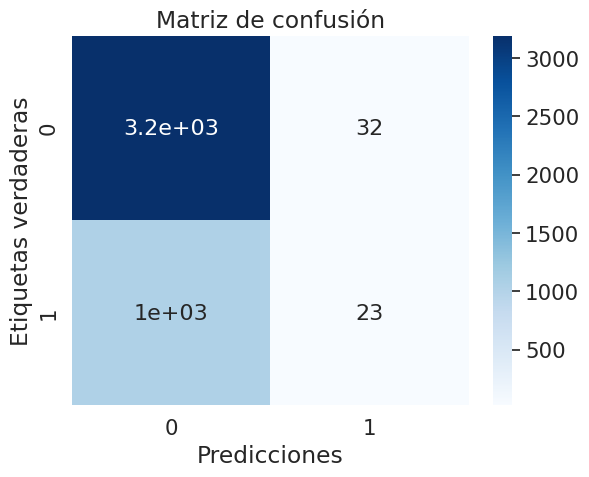

In [61]:
import seaborn as sns
# Predicciones en el conjunto de validación
y_pred = model.predict(X_validacion)
y_pred_classes = (y_pred > 0.5).astype(int)  # Conversión de probabilidades a clases binarias
y_validacion_bin = (y_validacion > 0.5).astype(int)
# Cálculo de la matriz de confusión
accuracy = accuracy_score(y_validacion_bin, y_pred_classes)
confusion_mat = confusion_matrix(y_validacion_bin, y_pred_classes)
print('Precisión:', accuracy*100,'%')
# Imprimir la matriz de confusión
# Graficar la matriz de confusión con Seaborn
sns.set(font_scale=1.4) # Ajustar el tamaño de la fuente
sns.heatmap(confusion_mat, annot=True, annot_kws={"size": 16}, cmap="Blues")

# Personalizar la figura
plt.title('Matriz de confusión')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas verdaderas')
plt.show()